In [1]:
import numpy as np
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, maskoceans
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
import copy
import netCDF4 as nc4
import cartopy.crs as ccrs
from matplotlib import ticker, cm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
nlon = 180
nlat = 90
grid_area = np.ones((nlat, nlon))*-9999.
earth_area =  5.096e14;
lat = np.arange(-89, 91, 2)
res = 2;
for i in np.arange(0,nlat):
    for j in np.arange(0,nlon):
        grid_area[i,j] = (earth_area/2)*abs(np.sin((lat[i] - res/2)*np.pi/180) -
                    np.sin((lat[i] + res/2)*np.pi/180))/(360/res)

In [6]:
## Open files to compare BGP and BGC effects from both different harvest method
yr_beg = 1850
nyr = 40
nlat = 46
nlon = 72

filename_in_1 = 'fates.transient_cbased.fixedbg_highvmax.elm.h0.1850_1889.compressed.nc'

## Do not modify the following
## Spinup history
# Monthly mean output
ds = nc4.Dataset(filename_in_1)

ref_rad_c = ds['FSR'][:] 
abs_rad_c = ds['SABG'][:]

lonnc = ds['lon'][:]
latnc = ds['lat'][:]

gpp_c = ds['FATES_GPP'][:] 

ds.close()


filename_in_2 = 'fates.transient_abased.fixedbg_highvmax.elm.h0.1850_1889.compressed.nc'

## Do not modify the following
## Spinup history
# Monthly mean output
ds = nc4.Dataset(filename_in_2)

ref_rad_a = ds['FSR'][:] 
abs_rad_a = ds['SABG'][:]

gpp_a = ds['FATES_GPP'][:] 

ds.close()

In [8]:
np.shape(lonnc)

(72L,)

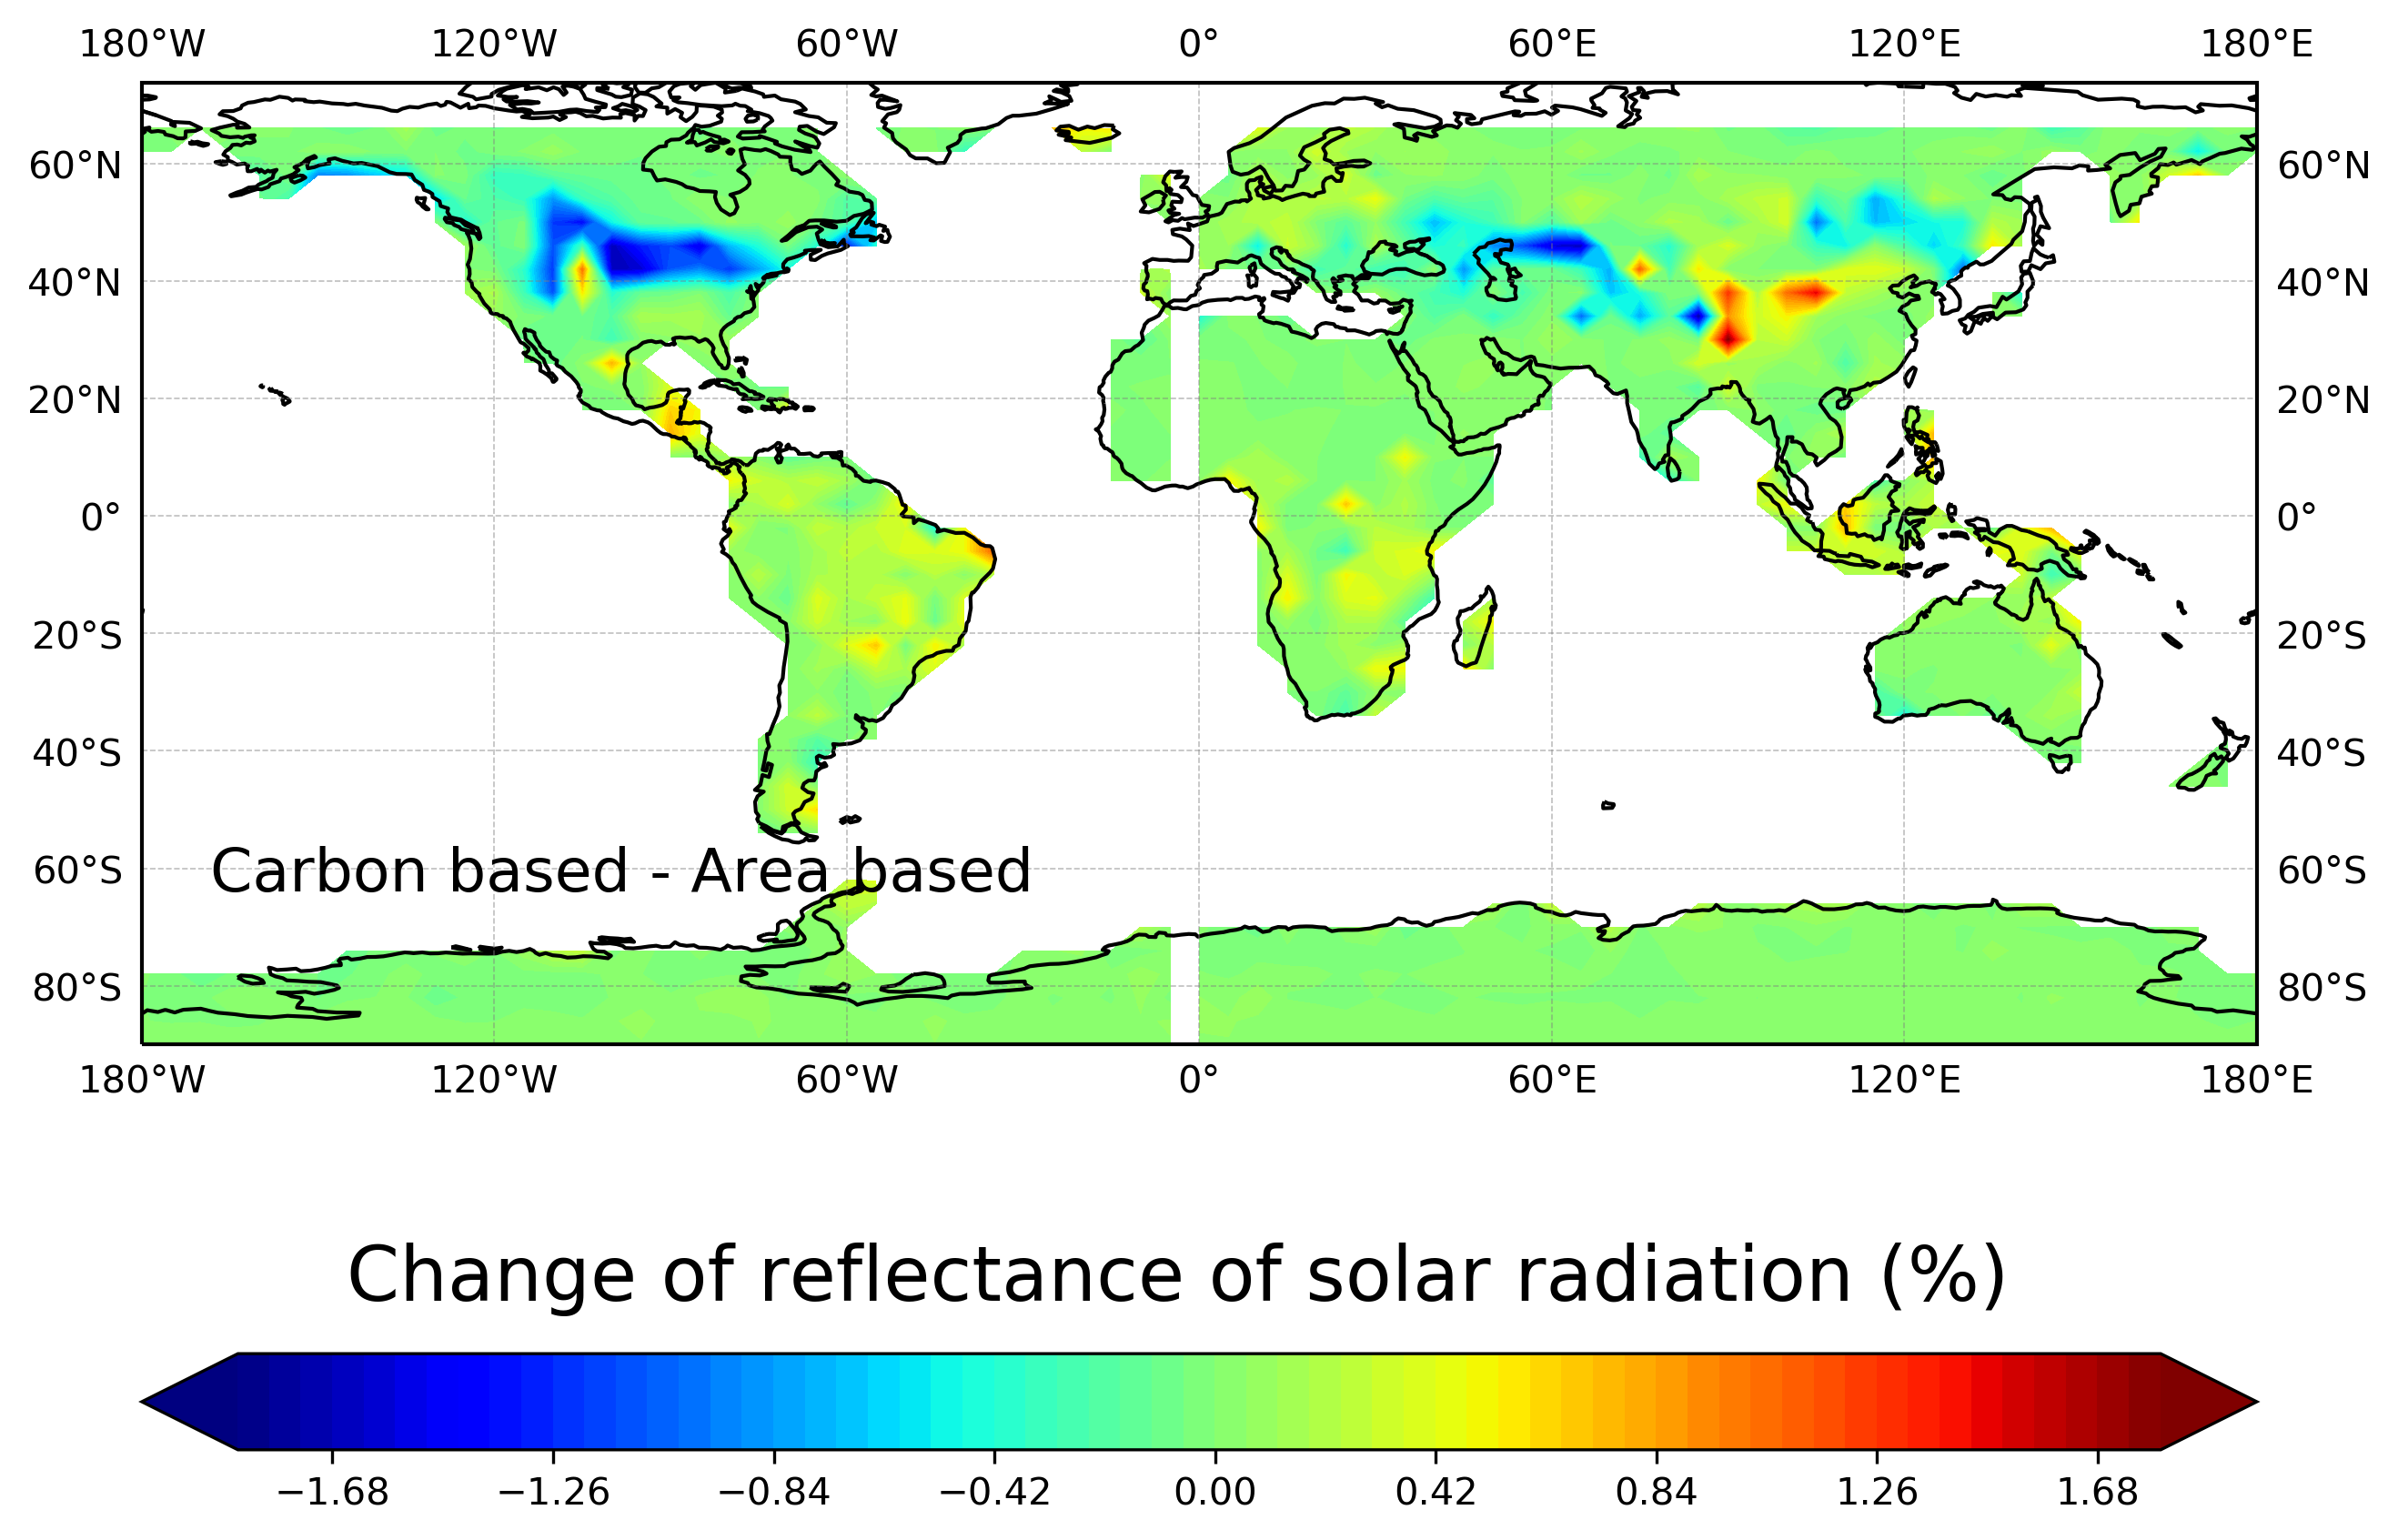

In [9]:
#### Plots of reflectance
ref_a = ref_rad_a/(ref_rad_a+abs_rad_a)
ref_c = ref_rad_c/(ref_rad_c+abs_rad_c)

fig = plt.figure(figsize=(10,10), dpi=300)
lonnc_new = copy.deepcopy(lonnc[:])
latnc_new = copy.deepcopy(latnc[:])

ax = plt.axes(projection=ccrs.PlateCarree())

cs = plt.contourf(lonnc_new, latnc_new, 4*(ref_c[nyr*12-13,:,:]-ref_c[0,:,:]), 60, #levels=np.linspace(0.0, 15.0, 151), 
                  # locator=ticker.LogLocator(),  
             extend='both',transform=ccrs.PlateCarree(), cmap=plt.cm.jet)

ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig.text(0.2, 0.22, 'Change of reflectance of solar radiation (%)', fontsize=20)
fig.text(0.15, 0.37, 'Carbon based - Area based', fontsize=16)
cbar = fig.colorbar(cs, fraction=0.1, orientation='horizontal')
# plt.show()
plt.savefig('DREF_C.png')

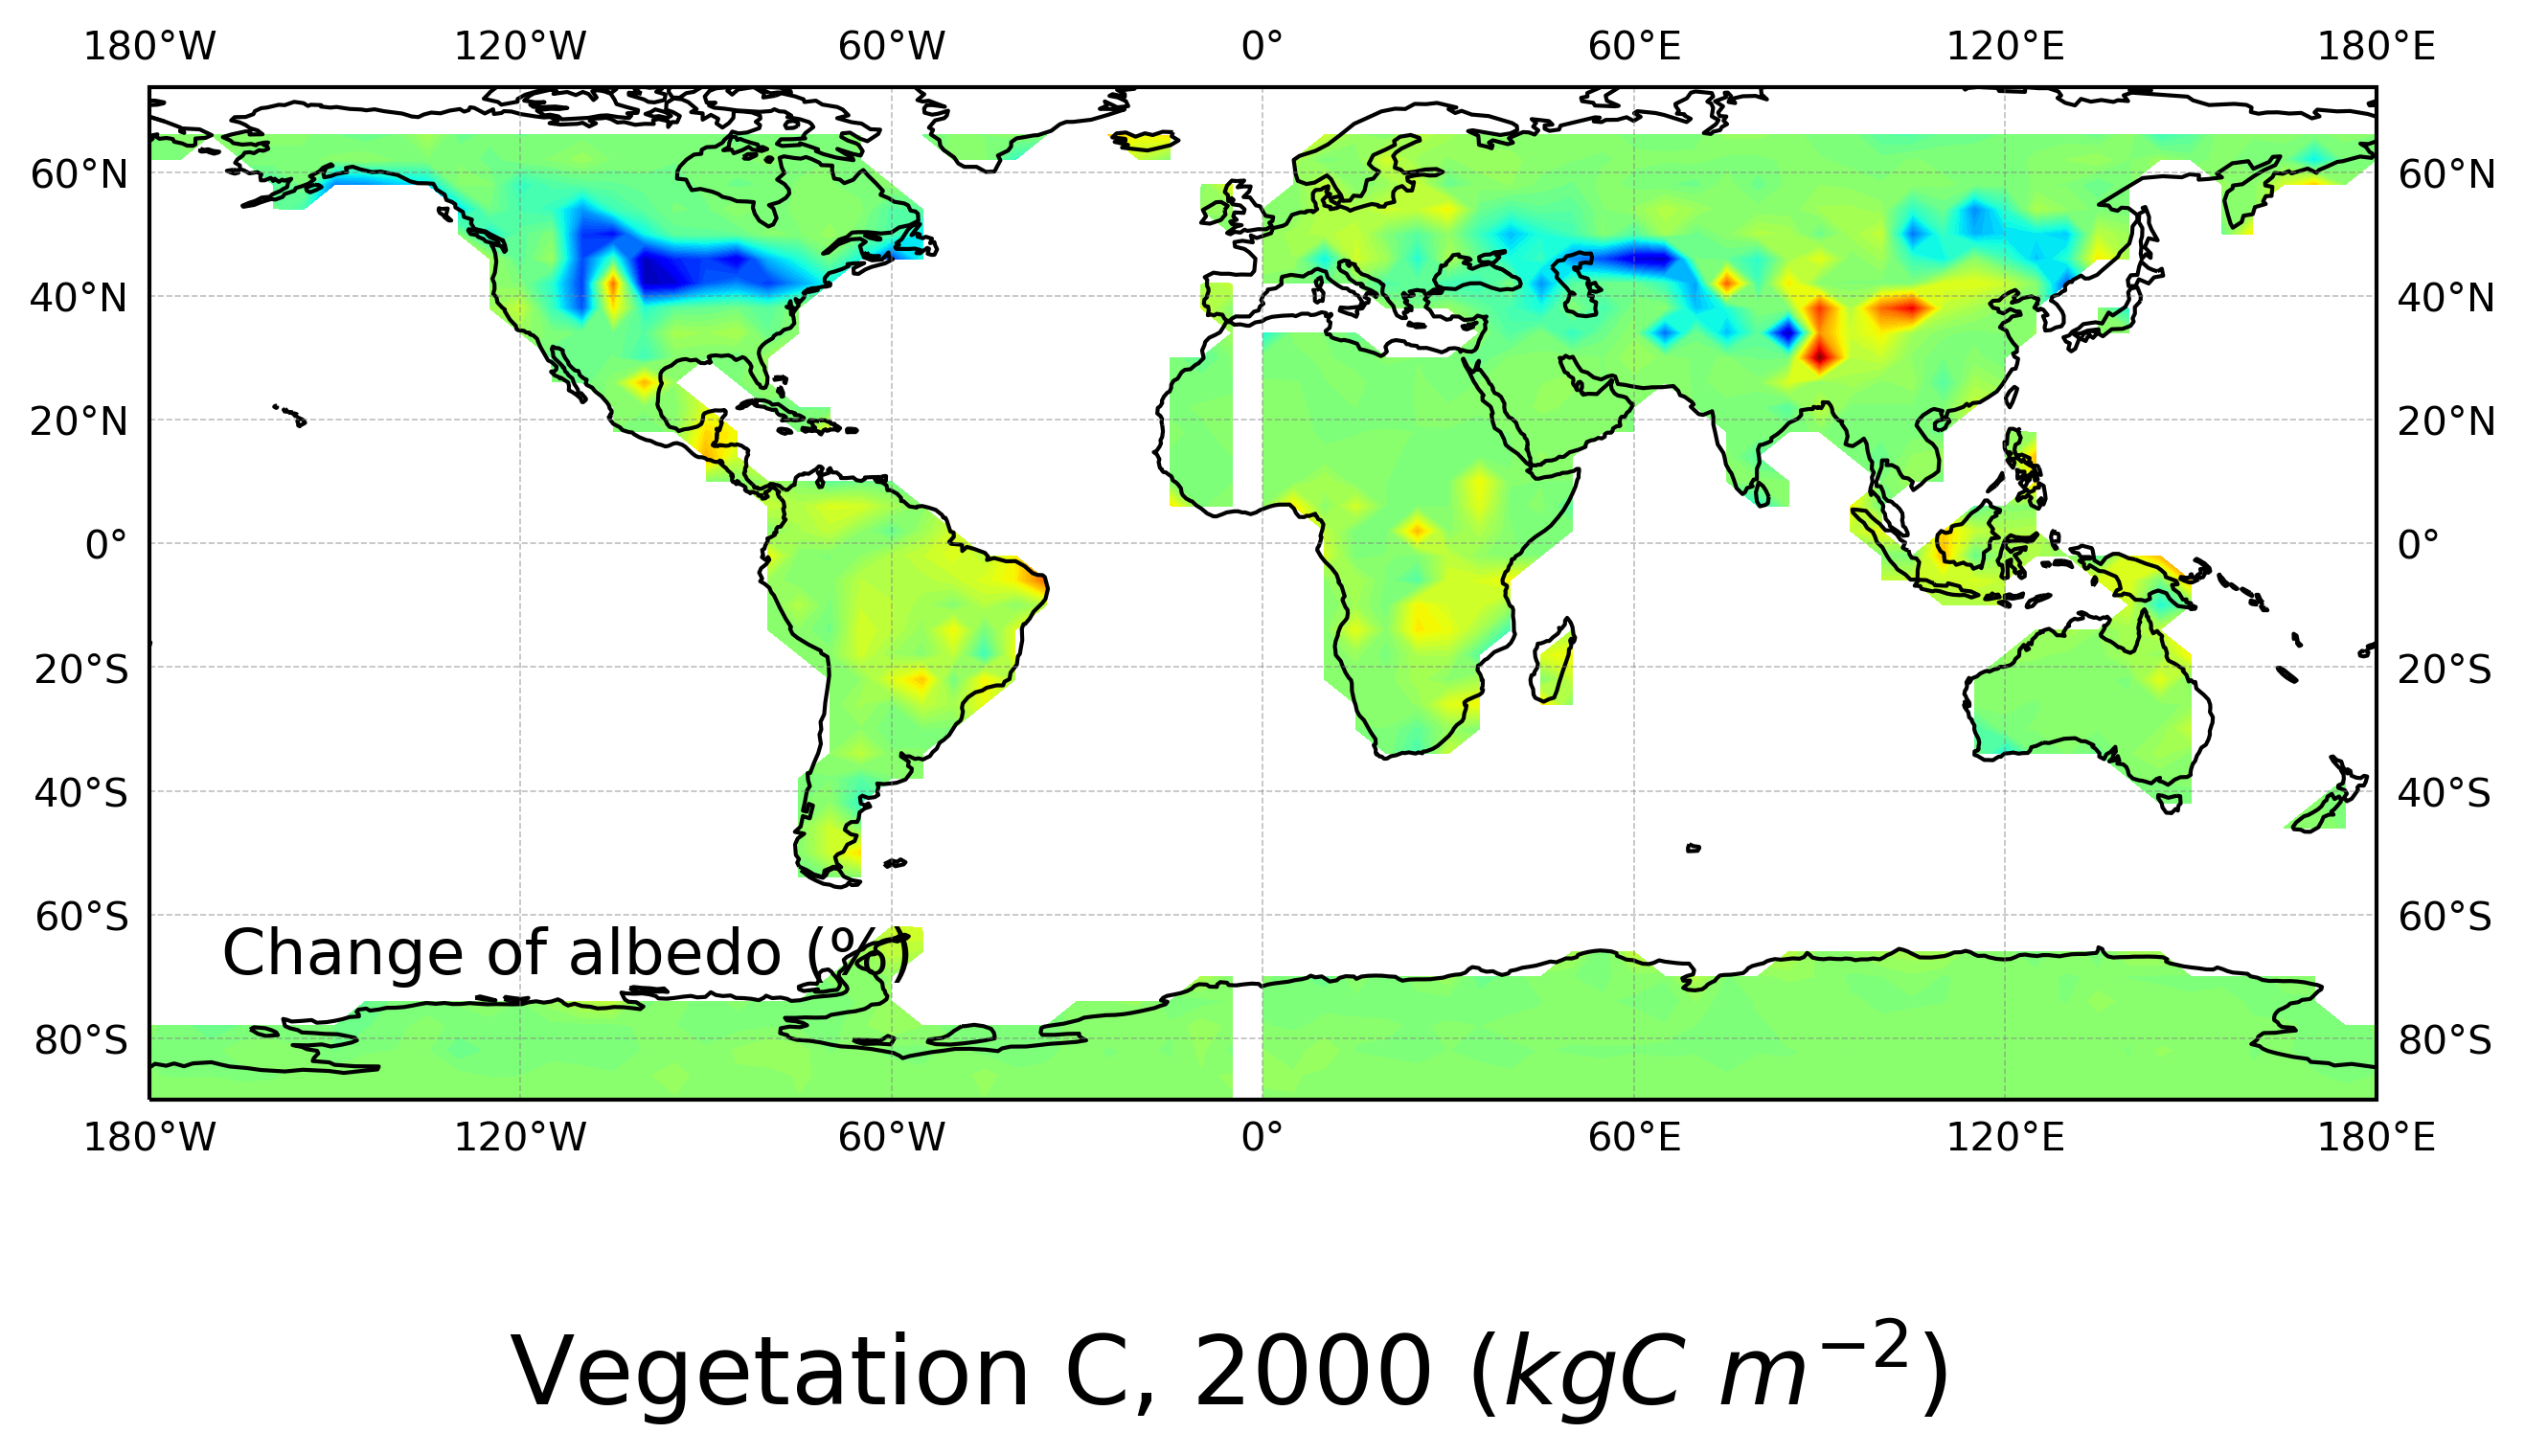

In [10]:
fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

cs = plt.contourf(lonnc_new, latnc_new, 4*(ref_a[nyr*12-13,:,:]-ref_a[0,:,:]), 60, #levels=np.linspace(0.0, 15.0, 151), 
                  # locator=ticker.LogLocator(),  
             extend='both',transform=ccrs.PlateCarree(), cmap=plt.cm.jet)

ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig.text(0.25, 0.22, 'Vegetation C, 2000 ($kgC\ m^{-2}$)', fontsize=24)
fig.text(0.15, 0.37, 'Change of albedo (%)', fontsize=16)
# cbar = fig.colorbar(cs, fraction=0.1, orientation='horizontal', ticks =[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0] )
# plt.show()
plt.savefig('DREF_A.png')

In [ ]:
## Differences of GPP

In [11]:
#### Plots of reflectance
ref_a = ref_rad_a/(ref_rad_a+abs_rad_a)
ref_c = ref_rad_c/(ref_rad_c+abs_rad_c)

fig = plt.figure(figsize=(10,10), dpi=300)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

ax = plt.axes(projection=ccrs.PlateCarree())

cs = plt.contourf(lonnc_new, latnc_new, (gpp_c[nyr*12-1,:,:]-gpp_a[nyr*12-1,:,:])*3600*24*365*1e3, 60, 
                  levels=np.linspace(-100.0, 100.0, 101), 
                  # locator=ticker.LogLocator(),  
             extend='both',transform=ccrs.PlateCarree(), cmap=plt.cm.jet)

ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig.text(0.3, 0.22, 'Change of GPP ($gC m^{-2} yr^{-1}$)', fontsize=20)
fig.text(0.15, 0.37, 'Carbon based - Area based', fontsize=16)
cbar = fig.colorbar(cs, fraction=0.1, orientation='horizontal')
# plt.show()
plt.savefig('DGPP_C.png')

IndexError: too many indices for array

<Figure size 3000x3000 with 0 Axes>

In [20]:
## Inputs from user
## Some constants
yr_beg = 1890
nyr = 120
nlat = 46
nlon = 72

##  get and open the history file
##  change the line below to point to the file that you've made,
##  which should be a concatenation of a bunch of FATES history files into a single file
filename_in = 'fates.transient_cbased.fixedbg_highvmax.elm.h0.1890_2009.compressed.nc'

## Do not modify the following
## Spinup history
# Monthly mean output
ds = nc4.Dataset(filename_in)

## read in variables
# sec_frac = fin.variables['FATES_SECONDARY_FOREST_FRACTION'][:]
biomass_ts = ds['FATES_VEGC'][:]
# biomass_age = ds['FATES_VEGC_SZPF'][:]
# canopy_age = ds['FATES_CANOPYAREA_AP'][:]
gpp_ts = ds['FATES_GPP'][:]
gpp_sec = ds['FATES_GPP_SECONDARY'][:]
npp_ts = ds['FATES_NPP'][:]
npp_sec = ds['FATES_NPP_SECONDARY'][:]
lai_ts = ds['FATES_LAI_SECONDARY'][:]
sec_biomass = ds['FATES_VEGC_SE_PF'][:]
sec_frac = ds['FATES_SECONDARY_FOREST_FRACTION'][:]
area_age = ds['FATES_PATCHAREA_AP'][:]
# nplant = ds['FATES_NPLANT'][:]
# nplant_sec = ds['FATES_NPLANT'][:]
npatches = ds['FATES_NPATCHES'][:]
npatches_sec = ds['FATES_NPATCHES_SECONDARY'][:]
ncohorts = ds['FATES_NCOHORTS'][:]
ncohorts_sec = ds['FATES_NCOHORTS_SECONDARY'][:]
nplants = ds['FATES_NPLANT_PF'][:]
nplants_sec = ds['FATES_NPLANT_SEC_PF'][:]
age_mort = ds['FATES_MORTALITY_AGESCEN_SZ'][:]
back_mort = ds['FATES_MORTALITY_BACKGROUND_SZ'][:]
starv_mort = ds['FATES_MORTALITY_CSTARV_SZ'][:]
# fire_mort = ds['FATES_MORTALITY_FIRE_SZ'][:]
freeze_mort = ds['FATES_MORTALITY_FREEZING_SZ'][:]
hydra_mort = ds['FATES_MORTALITY_HYDRAULIC_SZ'][:]
# impact_mort = ds['FATES_MORTALITY_IMPACT_SZ'][:]
logging_mort = ds['FATES_MORTALITY_LOGGING_SZ'][:]
scene_mort = ds['FATES_MORTALITY_SENESCENCE_SZ'][:]
# termi_mort = ds['FATES_MORTALITY_TERMINATION_SZ'][:]

age_mort_sec = ds['FATES_MORTALITY_AGESCEN_SE_SZ'][:]
back_mort_sec = ds['FATES_MORTALITY_BACKGROUND_SE_SZ'][:]
starv_mort_sec = ds['FATES_MORTALITY_CSTARV_SE_SZ'][:]
freeze_mort_sec = ds['FATES_MORTALITY_FREEZING_SE_SZ'][:]
hydra_mort_sec = ds['FATES_MORTALITY_HYDRAULIC_SE_SZ'][:]
logging_mort_sec = ds['FATES_MORTALITY_LOGGING_SE_SZ'][:]
scene_mort_sec = ds['FATES_MORTALITY_SENESCENCE_SE_SZ'][:]

# canopy_mort = ds['FATES_MORTALITY_CANOPY_SZ'][:]
# canopy_mort_sec = ds['FATES_MORTALITY_CANOPY_SE_SZ'][:]

hrv_debt = ds['HARVEST_DEBT'][:]
hrv_debt_sec = ds['HARVEST_DEBT_SEC'][:]
hrv_flux10c_elm = ds['HRV_DEADSTEMC_TO_PROD10C'][:]
hrv_flux100c_elm = ds['HRV_DEADSTEMC_TO_PROD100C'][:]
# landfrac = ds['landfrac'][:]

ds.close()

# Auxiliary data: land use time series
## Open land use time series
filename_in_luinput = 'landuse.timeseries_4x5_hist_simyr1850-2015_c11105.nc' 
fin_luinput = nc.netcdf_file(filename_in_luinput)
# Area in km2
ncvar_land = fin_luinput.variables['LANDFRAC_PFT'][:]
ncvar_pft = fin_luinput.variables['PCT_NAT_PFT'][:]
latnc = fin_luinput.variables['LATIXY'][:]
lonnc = fin_luinput.variables['LONGXY'][:]
fin_luinput.close()

filename_in_luinput2 = 'landuse.timeseries_4x5_hist_simyr1850-2015_200311_biomass_harvest.nc' 
fin_luinput2 = nc.netcdf_file(filename_in_luinput2)
# Area in km2
ncvar_area = fin_luinput2.variables['AREA'][:]
lu_hrv_c_vh1 = fin_luinput2.variables['HARVEST_VH1'][:]
lu_hrv_c_vh2 = fin_luinput2.variables['HARVEST_VH2'][:]
lu_hrv_c_sh1 = fin_luinput2.variables['HARVEST_SH1'][:]
lu_hrv_c_sh2 = fin_luinput2.variables['HARVEST_SH2'][:]
lu_hrv_c_sh3 = fin_luinput2.variables['HARVEST_SH3'][:]
lu_hrv_frac_vh1 = fin_luinput2.variables['HARVEST_VH1_FRAC'][:]
lu_hrv_frac_vh2 = fin_luinput2.variables['HARVEST_VH2_FRAC'][:]
lu_hrv_frac_sh1 = fin_luinput2.variables['HARVEST_SH1_FRAC'][:]
lu_hrv_frac_sh2 = fin_luinput2.variables['HARVEST_SH2_FRAC'][:]
lu_hrv_frac_sh3 = fin_luinput2.variables['HARVEST_SH3_FRAC'][:]
fin_luinput2.close()

area_4x5 = ncvar_area
land_4x5 = ncvar_land
lat_4x5 = latnc
lon_4x5 = lonnc

IOError: [Errno 2] No such file or directory: 'fates.transient_cbased.fixedbg_highvmax.elm.h0.1890_2009.compressed.nc'

In [ ]:
np.shape(sec_frac)

#### Line plot showing the total VegC per PFT in all secondary patches.

In [19]:
## Calculate global total vegetation C
# Get the latitudinal mean of the forest biomass of all datasets
vegc_pf_sec_copy = copy.deepcopy(sec_biomass)
vegc_pf_sec_copy[vegc_pf_sec_copy>1e2] = np.float('nan')
vegc_pf_sec_copy[vegc_pf_sec_copy<0] = np.float('nan')
vegc_fates_for = np.sum(vegc_pf_sec_copy[(12*nyr-1),0:9,:,:], 0)
vegc_1 = vegc_pf_sec_copy[(12*nyr-1),0,:,:]
vegc_2 = vegc_pf_sec_copy[(12*nyr-1),1,:,:]
vegc_3 = vegc_pf_sec_copy[(12*nyr-1),2,:,:]
vegc_4 = vegc_pf_sec_copy[(12*nyr-1),3,:,:]
vegc_5 = vegc_pf_sec_copy[(12*nyr-1),4,:,:]
vegc_6 = vegc_pf_sec_copy[(12*nyr-1),5,:,:]
vegc_7 = vegc_pf_sec_copy[(12*nyr-1),6,:,:]
vegc_8 = vegc_pf_sec_copy[(12*nyr-1),7,:,:]
vegc_9 = vegc_pf_sec_copy[(12*nyr-1),8,:,:]

# FATES latitudinal distribution
vegc_lat_for = np.nanmean(vegc_fates_for, 1)
vegc_lat_for[vegc_lat_for<=0] = np.float('nan')
vegc_1_lat = np.nanmean(vegc_1, 1)
vegc_2_lat = np.nanmean(vegc_2, 1)
vegc_3_lat = np.nanmean(vegc_3, 1)
vegc_4_lat = np.nanmean(vegc_4, 1)
vegc_5_lat = np.nanmean(vegc_5, 1)
vegc_6_lat = np.nanmean(vegc_6, 1)
vegc_7_lat = np.nanmean(vegc_7, 1)
vegc_8_lat = np.nanmean(vegc_8, 1)
vegc_9_lat = np.nanmean(vegc_9, 1)

# FATES changes of total amount
vegc_pft1_tot = np.zeros((nyr))
vegc_pft2_tot = np.zeros((nyr))
vegc_pft3_tot = np.zeros((nyr))
vegc_pft4_tot = np.zeros((nyr))
vegc_pft5_tot = np.zeros((nyr))
vegc_pft6_tot = np.zeros((nyr))
vegc_pft7_tot = np.zeros((nyr))
vegc_pft8_tot = np.zeros((nyr))
vegc_pft9_tot = np.zeros((nyr))
vegc_tot = np.zeros((nyr))

for i in np.arange(0,nyr):
    vegc_pft1_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,0,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft2_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,1,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft3_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,2,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft4_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,3,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft5_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,4,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft6_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,5,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft7_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,6,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft8_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,7,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_pft9_tot[i] = np.nansum(vegc_pf_sec_copy[i*12,8,:,:]*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12
    vegc_tot[i] = np.nansum(np.nansum(vegc_pf_sec_copy[i*12,0:9,:,:],0)*area_4x5*sec_frac[i*12,:,:]*1e6)/1e12



C:\Users\sshu3\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


IndexError: index 1439 is out of bounds for axis 0 with size 480

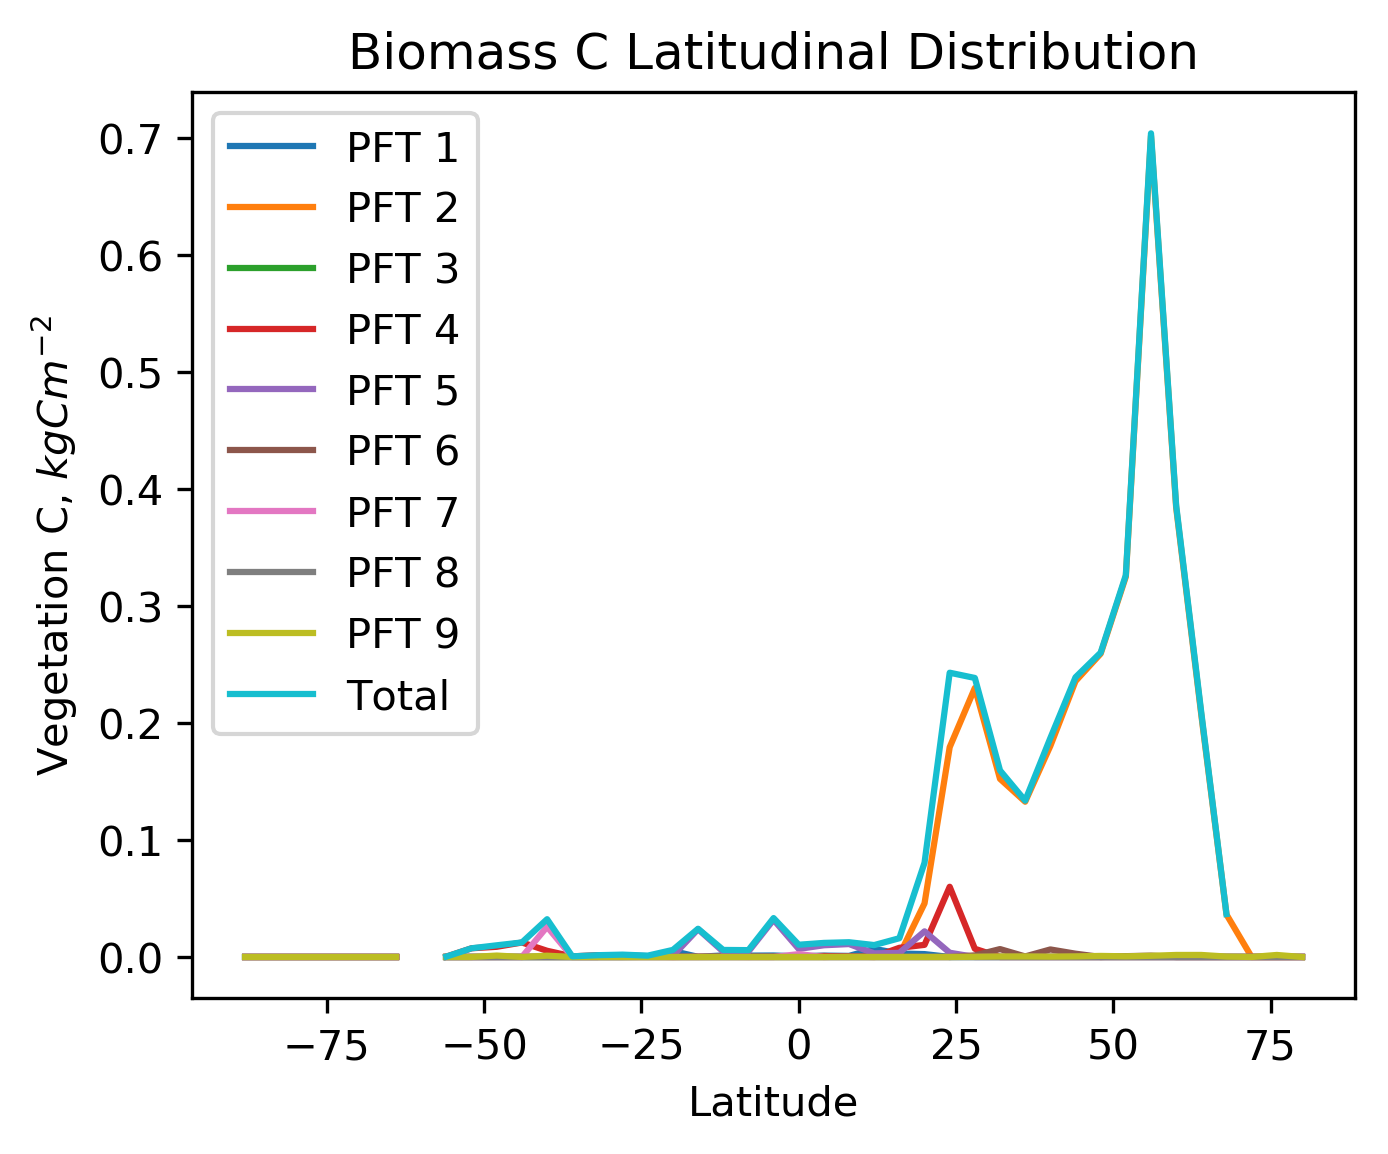

In [15]:
# Per PFT latitudinal distribution
figure(figsize=(5, 4), dpi=300)
x3 = np.arange(-92, 92, 4)
plt.plot(x3, vegc_1_lat)
plt.plot(x3, vegc_2_lat)
plt.plot(x3, vegc_3_lat)
plt.plot(x3, vegc_4_lat)
plt.plot(x3, vegc_5_lat)
plt.plot(x3, vegc_6_lat)
plt.plot(x3, vegc_7_lat)
plt.plot(x3, vegc_8_lat)
plt.plot(x3, vegc_9_lat)
plt.plot(x3, vegc_lat_for)

plt.legend(['PFT 1', 'PFT 2', 'PFT 3', 'PFT 4', 'PFT 5', 'PFT 6', 'PFT 7', 'PFT 8', 'PFT 9', 'Total'])
plt.title('Biomass C Latitudinal Distribution')
plt.xlabel('Latitude')
plt.ylabel('Vegetation C, $kgC m^{-2}$')
# plt.ylim([0, 8])
plt.savefig('SecVeg_lat_2000.png')

In [17]:
np.shape(vegc_pft1_tot)

(40L,)

ValueError: x and y must have same first dimension, but have shapes (120L,) and (40L,)

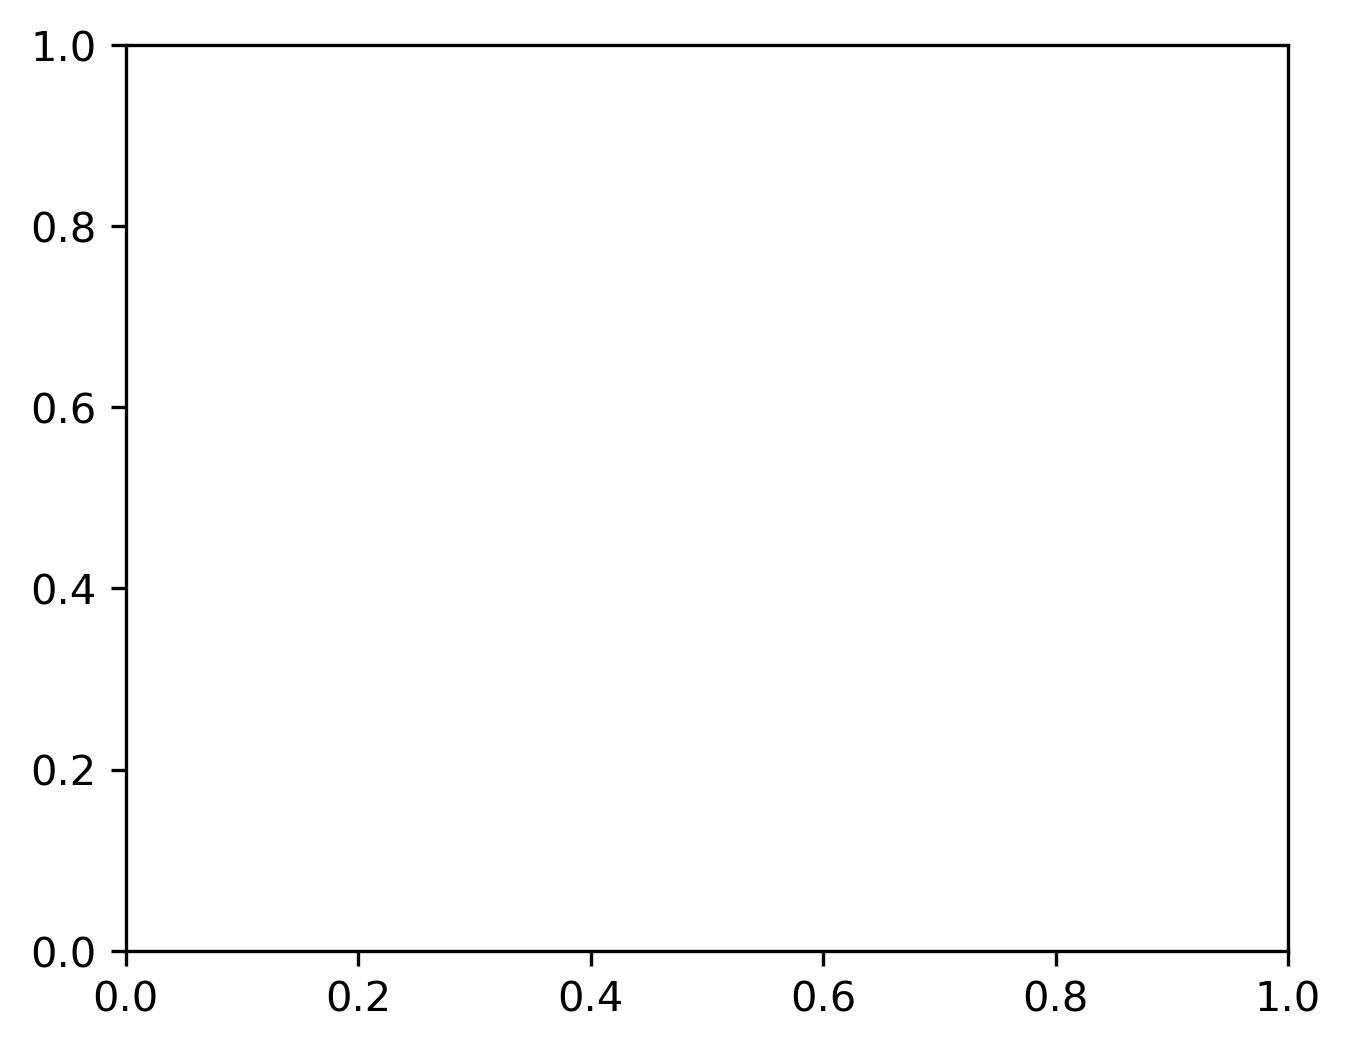

In [16]:
# Time series
figure(figsize=(5, 4), dpi=300)
x1 = np.arange(1890, 2010, 1)
plt.plot(x1, vegc_pft1_tot)
plt.plot(x1, vegc_pft2_tot)
plt.plot(x1, vegc_pft3_tot)
plt.plot(x1, vegc_pft4_tot)
plt.plot(x1, vegc_pft5_tot)
plt.plot(x1, vegc_pft6_tot)
plt.plot(x1, vegc_pft7_tot)
plt.plot(x1, vegc_pft8_tot)
plt.plot(x1, vegc_pft9_tot)
plt.plot(x1, vegc_tot)

plt.legend(['PFT 1', 'PFT 2', 'PFT 3', 'PFT 4', 'PFT 5', 'PFT 6', 'PFT 7', 'PFT 8', 'PFT 9', 'Total'])
plt.title('Secondary veg C per PFT time series')
plt.xlabel('Latitude')
plt.ylabel('Vegetation C, $PgC$')
# plt.ylim([0, 8])
plt.savefig('SecVeg_1890_2009.png')

#### Make plots

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=300)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

ax = plt.axes(projection=ccrs.PlateCarree())
dompft[dompft<=0] = np.float('nan')
cs = plt.contourf(lonnc_new, latnc_new, dompft[:,:], 60, levels=np.linspace(0.0, 9.0, 10), 
                  # locator=ticker.LogLocator(),  
             extend='both',transform=ccrs.PlateCarree(), cmap=plt.cm.jet)

ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# fig.text(0.25, 0.22, 'PFT types', fontsize=24)
fig.text(0.15, 0.37, '(a) Dominant PFT type from FATES fixed_biogeography simulation', fontsize=16)
cbar = fig.colorbar(cs, fraction=0.1, orientation='horizontal')
# plt.show()
plt.savefig('DPFT_FATES_2000.png')

#### Old codes, need to be optimized.

In [21]:
############################################################
### Diagnosis of transient case
############################################################

## Inputs from user
## Some constants
yr_beg = 1890
nyr = 120

##  get and open the history file
##  change the line below to point to the file that you've made,
##  which should be a concatenation of a bunch of FATES history files into a single file
filename_in = 'sshu.cori-haswell.E4f9ce69d2-Faaa10622.2022-03-20.elm.h0.chrv.1890_2009.nc'

## Do not modify the following
## Spinup history
# Monthly mean output
fin = nc.netcdf_file(filename_in)

## read the coordinate data for the various dimensions
## for both files they are the same so one-time read is good enough
time = (fin.variables['time'][:] - 1) / 365  ### time dimension, put in unit of years

## define the sizes of each dimension
ntim = len(time)

## read in variables
## read in variables
# sec_frac = fin.variables['FATES_SECONDARY_FOREST_FRACTION'][:]
biomass_ts = fin.variables['FATES_VEGC'][:]
# biomass_age = fin.variables['FATES_VEGC_SZPF'][:]
# canopy_age = fin.variables['FATES_CANOPYAREA_AP'][:]
gpp_ts = fin.variables['FATES_GPP'][:]
gpp_sec = fin.variables['FATES_GPP_SECONDARY'][:]
npp_ts = fin.variables['FATES_NPP'][:]
npp_sec = fin.variables['FATES_NPP_SECONDARY'][:]
lai_ts = fin.variables['FATES_LAI_SECONDARY'][:]
sec_biomass = fin.variables['FATES_SECONDARY_FOREST_VEGC'][:]
area_age = fin.variables['FATES_PATCHAREA_AP'][:]
# nplant = fin.variables['FATES_NPLANT'][:]
# nplant_sec = fin.variables['FATES_NPLANT'][:]
npatches = fin.variables['FATES_NPATCHES'][:]
npatches_sec = fin.variables['FATES_NPATCHES_SECONDARY'][:]
ncohorts = fin.variables['FATES_NCOHORTS'][:]
ncohorts_sec = fin.variables['FATES_NCOHORTS_SECONDARY'][:]
nplants = fin.variables['FATES_NPLANT_PF'][:]
nplants_sec = fin.variables['FATES_NPLANT_SEC_PF'][:]
age_mort = fin.variables['FATES_MORTALITY_AGESCEN_SZ'][:]
back_mort = fin.variables['FATES_MORTALITY_BACKGROUND_SZ'][:]
starv_mort = fin.variables['FATES_MORTALITY_CSTARV_SZ'][:]
# fire_mort = fin.variables['FATES_MORTALITY_FIRE_SZ'][:]
freeze_mort = fin.variables['FATES_MORTALITY_FREEZING_SZ'][:]
hydra_mort = fin.variables['FATES_MORTALITY_HYDRAULIC_SZ'][:]
# impact_mort = fin.variables['FATES_MORTALITY_IMPACT_SZ'][:]
logging_mort = fin.variables['FATES_MORTALITY_LOGGING_SZ'][:]
scene_mort = fin.variables['FATES_MORTALITY_SENESCENCE_SZ'][:]
# termi_mort = fin.variables['FATES_MORTALITY_TERMINATION_SZ'][:]

age_mort_sec = fin.variables['FATES_MORTALITY_AGESCEN_SE_SZ'][:]
back_mort_sec = fin.variables['FATES_MORTALITY_BACKGROUND_SE_SZ'][:]
starv_mort_sec = fin.variables['FATES_MORTALITY_CSTARV_SE_SZ'][:]
freeze_mort_sec = fin.variables['FATES_MORTALITY_FREEZING_SE_SZ'][:]
hydra_mort_sec = fin.variables['FATES_MORTALITY_HYDRAULIC_SE_SZ'][:]
logging_mort_sec = fin.variables['FATES_MORTALITY_LOGGING_SE_SZ'][:]
scene_mort_sec = fin.variables['FATES_MORTALITY_SENESCENCE_SE_SZ'][:]

# canopy_mort = fin.variables['FATES_MORTALITY_CANOPY_SZ'][:]
# canopy_mort_sec = fin.variables['FATES_MORTALITY_CANOPY_SE_SZ'][:]

hrv_debt = fin.variables['HARVEST_DEBT'][:]
hrv_debt_sec = fin.variables['HARVEST_DEBT_SEC'][:]
hrv_flux10c_elm = fin.variables['HRV_DEADSTEMC_TO_PROD10C'][:]
hrv_flux100c_elm = fin.variables['HRV_DEADSTEMC_TO_PROD100C'][:]
# landfrac = fin.variables['landfrac'][:]

fin.close()

# Auxiliary data: land use time series
## Open land use time series
filename_in_luinput = 'landuse.timeseries_4x5_hist_simyr1850-2015_c11105.nc' 
fin_luinput = nc.netcdf_file(filename_in_luinput)
# Area in km2
ncvar_land = fin_luinput.variables['LANDFRAC_PFT'][:]
ncvar_pft = fin_luinput.variables['PCT_NAT_PFT'][:]
latnc = fin_luinput.variables['LATIXY'][:]
lonnc = fin_luinput.variables['LONGXY'][:]
fin_luinput.close()

filename_in_luinput2 = 'landuse.timeseries_4x5_hist_simyr1850-2015_200311_biomass_harvest.nc' 
fin_luinput2 = nc.netcdf_file(filename_in_luinput2)
# Area in km2
ncvar_area = fin_luinput2.variables['AREA'][:]
lu_hrv_c_vh1 = fin_luinput2.variables['HARVEST_VH1'][:]
lu_hrv_c_vh2 = fin_luinput2.variables['HARVEST_VH2'][:]
lu_hrv_c_sh1 = fin_luinput2.variables['HARVEST_SH1'][:]
lu_hrv_c_sh2 = fin_luinput2.variables['HARVEST_SH2'][:]
lu_hrv_c_sh3 = fin_luinput2.variables['HARVEST_SH3'][:]
lu_hrv_frac_vh1 = fin_luinput2.variables['HARVEST_VH1_FRAC'][:]
lu_hrv_frac_vh2 = fin_luinput2.variables['HARVEST_VH2_FRAC'][:]
lu_hrv_frac_sh1 = fin_luinput2.variables['HARVEST_SH1_FRAC'][:]
lu_hrv_frac_sh2 = fin_luinput2.variables['HARVEST_SH2_FRAC'][:]
lu_hrv_frac_sh3 = fin_luinput2.variables['HARVEST_SH3_FRAC'][:]
fin_luinput2.close()

area_4x5 = ncvar_area
land_4x5 = ncvar_land
nat_area_frac = np.nansum(area_age, 1)
nat_area_frac[nat_area_frac>1] = np.float('nan')
lat_4x5 = latnc
lon_4x5 = lonnc
lu_hrv_frac = lu_hrv_frac_vh1+lu_hrv_frac_vh2#+lu_hrv_frac_sh1+lu_hrv_frac_sh2+lu_hrv_frac_sh3
lu_hrv_c = lu_hrv_c_vh1+lu_hrv_c_vh2#+lu_hrv_c_sh1+lu_hrv_c_sh2+lu_hrv_c_sh3
fates_hrv_c = hrv_flux10c_elm+hrv_flux100c_elm

IOError: [Errno 2] No such file or directory: 'sshu.cori-haswell.E4f9ce69d2-Faaa10622.2022-03-20.elm.h0.chrv.1890_2009.nc'

In [ ]:
# Check mortalities
plants_pft = nplants[0,:,:,:]
plants_sec_pft = nplants_sec[0,:,:,:]
plants_tot = np.nansum(nplants[0,:,:,:], 0)
plants_sec_tot = np.nansum(nplants_sec[0,:,:,:], 0)
forest_tot = np.nansum(nplants[0,0:9,:,:], 0)
forest_sec = np.nansum(nplants_sec[0,0:9,:,:], 0)

mort_tot = np.nansum(age_mort[0,:,:,:], 0) + np.nansum(back_mort[0,:,:,:], 0) + \
      np.nansum(starv_mort[0,:,:,:], 0) + np.nansum(freeze_mort[0,:,:,:], 0) + \
      np.nansum(hydra_mort[0,:,:,:], 0) + np.nansum(logging_mort[0,:,:,:], 0) + \
      np.nansum(scene_mort[0,:,:,:], 0)
mort_sec = np.nansum(age_mort_sec[0,:,:,:], 0) + np.nansum(back_mort_sec[0,:,:,:], 0) + \
      np.nansum(starv_mort_sec[0,:,:,:], 0) + np.nansum(freeze_mort_sec[0,:,:,:], 0) + \
      np.nansum(hydra_mort_sec[0,:,:,:], 0) + np.nansum(logging_mort_sec[0,:,:,:], 0) + \
      np.nansum(scene_mort_sec[0,:,:,:], 0)

# Check mortality rate
rmort_tot = mort_tot/plants_tot
rmort_sec = mort_sec/plants_sec_tot

rmort_tot[rmort_tot>1] = np.float('nan')
rmort_sec[rmort_sec>1] = np.float('nan')


In [ ]:
np.shape(sec_biomass)

In [ ]:
sec_biomass[0,:,:]/biomass_ts[0,:,:]

In [ ]:
plants_tot

In [ ]:
rmort_tot

In [ ]:
# Plot comparison for secondary area vs. biomass (%)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,npp_sec[0,:,:]/npp_ts[0,:,:],
#               norm=colors.LogNorm(vmin=1e-4, vmax=1e-2),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=0, vmax=1.0),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES area fraction', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,sec_biomass[0,:,:]/biomass_ts[0,:,:],
#              norm=colors.LogNorm(vmin=1e-4, vmax=1e-1),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=0, vmax=1.0),cmap=plt.cm.jet) # use log color scale

cbar2 = map.colorbar(cs2,ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) FATES secondary biomass fraction', fontsize=24)

plt.show()

In [ ]:
# Plot comparison for total vs. secondary (NPP, kgC m-2 month-1)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,gpp_ts[0,:,:]*3600*24*31,
#               norm=colors.LogNorm(vmin=1e-4, vmax=1e-2),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=0, vmax=0.5),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES NPP', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,gpp_sec[0,:,:]*3600*24*31,
#              norm=colors.LogNorm(vmin=1e-4, vmax=1e-1),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=0, vmax=0.5),cmap=plt.cm.jet) # use log color scale

cbar2 = map.colorbar(cs2,ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) FATES Secondary NPP', fontsize=24)

plt.show()

In [ ]:
# Plot comparison for total vs. secondary (Mortality rate, % of plant numbers, based on year-1)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,rmort_tot[:,:],
#               norm=colors.LogNorm(vmin=1e-4, vmax=1e-2),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=0, vmax=0.06),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES Mortalities', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,rmort_sec[:,:],
#              norm=colors.LogNorm(vmin=1e-4, vmax=1e-1),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=0, vmax=0.06),cmap=plt.cm.jet) # use log color scale

cbar2 = map.colorbar(cs2,ticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) FATES Secondary Mortalities', fontsize=24)

plt.show()


In [ ]:
# Plot comparison for total vs. secondary (Mortality, plant numbers year-1)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,mort_tot[:,:],
              norm=colors.LogNorm(vmin=1e-2, vmax=1e1),cmap=plt.cm.jet) # use log color scale,
#             norm=colors.Normalize(vmin=0, vmax=0.06),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[1e-2, 1e-1, 1, 1e1],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES Mortalities', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,mort_sec[:,:],
             norm=colors.LogNorm(vmin=1e-2, vmax=1e1),cmap=plt.cm.jet) # use log color scale,
#             norm=colors.Normalize(vmin=0, vmax=0.06),cmap=plt.cm.jet) # use log color scale

cbar2 = map.colorbar(cs2,ticks=[1e-2, 1e-1, 1, 1e1],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) FATES Secondary Mortalities', fontsize=24)

plt.show()

In [ ]:
# Plot comparison for total vs. secondary (Number of plants, #, based on year-1)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,forest_tot[:,:],
              norm=colors.LogNorm(vmin=1e-2, vmax=1e1),cmap=plt.cm.jet) # use log color scale,
#             norm=colors.Normalize(vmin=0, vmax=200),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[1e-2, 1e-1, 1, 1e1],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES plant number m-2', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,forest_sec[:,:],
             norm=colors.LogNorm(vmin=1e-2, vmax=1e1),cmap=plt.cm.jet) # use log color scale,
#             norm=colors.Normalize(vmin=0, vmax=200),cmap=plt.cm.jet) # use log color scale

cbar2 = map.colorbar(cs2,ticks=[1e-2, 1e-1, 1, 1e1],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) FATES Secondary plant number m-2', fontsize=24)

plt.show()

In [ ]:
# Plot comparison for total vs. secondary (Number of cohorts, #, based on year-1)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,ncohorts[0,:,:],
              norm=colors.LogNorm(vmin=1, vmax=1e4),cmap=plt.cm.jet) # use log color scale,
#             norm=colors.Normalize(vmin=0, vmax=200),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[1, 1e1, 1e2, 1e3, 1e4],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES Cohorts', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,ncohorts_sec[0,:,:],
             norm=colors.LogNorm(vmin=1, vmax=1e4),cmap=plt.cm.jet) # use log color scale,
#             norm=colors.Normalize(vmin=0, vmax=200),cmap=plt.cm.jet) # use log color scale

cbar2 = map.colorbar(cs2,ticks=[1, 1e1, 1e2, 1e3, 1e4],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) FATES Secondary Cohorts', fontsize=24)

plt.show()

In [ ]:
# Secondary forest area map (in fraction)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,sec_frac[1919,:,:],
#               norm=colors.LogNorm(vmin=1e-4, vmax=1e-2),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.LogNorm(vmin=1e-2, vmax=1),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[1e-2, 5e-2, 1e-1, 5e-1, 1],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES Secondary Fraction', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,sec_biomass[1919,:,:],
#              norm=colors.LogNorm(vmin=1e-4, vmax=1e-1),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.LogNorm(vmin=1, vmax=100),cmap=plt.cm.jet) # use log color scale,

cbar2 = map.colorbar(cs2,ticks=[1, 5, 10, 50, 100],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) FATES Secondary C', fontsize=24)

plt.show()
# plt.savefig('FATES_SEC.jpg',dpi=300)

In [ ]:
# Line plot secondary C vs. total C
biomass_day = copy.deepcopy(biomass_ts)
biomass_sec_day = copy.deepcopy(sec_biomass)

# Clear data with ocean mask
biomass_day[biomass_day>1e4] = np.float('nan')
biomass_sec_day[biomass_sec_day>1e4] = np.float('nan')

# New vars
biomass_yr = np.ones([nyr, 46, 72])*np.float('nan')
biomass_yr_sec = np.ones([nyr, 46, 72])*np.float('nan')
delta_biomass_sec = np.ones([nyr-1, 46, 72])*np.float('nan')

for iyr in np.arange(0,nyr):
    id_beg = iyr*12
    id_end = (iyr+1)*12-1
    biomass_yr[iyr,:,:] = np.nanmean(biomass_day[id_beg:id_end,:,:])*area_4x5*nat_area_frac[0,:,:]*1e6
    biomass_yr_sec[iyr,:,:] = np.nanmean(biomass_sec_day[id_beg:id_end,:,:])*area_4x5*nat_area_frac[0,:,:]*1e6
    if(iyr > 0):
        delta_biomass_sec[iyr-1,:,:] = biomass_yr_sec[iyr,:,:] - biomass_yr_sec[iyr-1,:,:]

biomass_yr_tot = np.nansum(np.nansum(biomass_yr, 2), 1)/1e12
biomass_sec_yr_tot = np.nansum(np.nansum(biomass_yr_sec, 2), 1)/1e12
plt.plot(biomass_yr_tot, 'b-', linewidth=3)
plt.plot(biomass_sec_yr_tot, 'g--', linewidth=5)
plt.xlabel('Years since 1950')
plt.ylabel('Forest C ($PgC$)')
plt.legend(['Total', 'Secondary'])
plt.title('Check total C vs. secondary C')
plt.show()
# plt.savefig('validate_luc_frac_global.png')



In [ ]:
# Mask ocean
fates_hrv_c[fates_hrv_c>1e4] = np.float('nan')

# Secondary forest area map (in KgC)
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,fates_hrv_c[1919,:,:]*1e-3*area_4x5*1e6*3600*24*365,
#               norm=colors.LogNorm(vmin=1e-4, vmax=1e-1),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.LogNorm(vmin=1e4, vmax=1e9),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[1e4, 1e5, 1e6, 1e7, 1e8, 1e9],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) FATES', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,lu_hrv_c[159,:,:],
#              norm=colors.LogNorm(vmin=1e4, vmax=1e9),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.LogNorm(vmin=1e4, vmax=1e9),cmap=plt.cm.jet) # use log color scale,

cbar2 = map.colorbar(cs2,ticks=[1e4, 1e5, 1e6, 1e7, 1e8, 1e9],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.43, '(b) LUH2', fontsize=24)

plt.show()
# plt.savefig('PRIM_HARV.jpg',dpi=300)

In [ ]:
# Check the total harvested C.
## Validate harvested C (gC m-2 yr-1). 
lu_hrv_c_tot = copy.deepcopy(lu_hrv_c)
lu_hrv_prim_c_tot = copy.deepcopy(lu_hrv_c-lu_hrv_c_sec)
fates_hrv_c_tot = np.zeros((nyr, 46, 72))

# Apply Mask 
# No cohorts
fates_hrv_c[fates_hrv_c>1] = np.float('nan')

for iyr in np.arange(0,nyr-1):
    # Middle of year
    id_beg = iyr*12+1
    # gC m-2 s-1 -> kg C
    fates_hrv_c_tot[iyr, :, :] = fates_hrv_c[id_beg,:,:]*1e-3*area_4x5*1e6*3600*24*365
    
hrv_c_luh2_yr_tot = np.nansum(np.nansum(lu_hrv_c_tot, 2), 1)/1e12
hrv_c_luh2_prim_yr_tot = np.nansum(np.nansum(lu_hrv_prim_c_tot, 2), 1)/1e12
hrv_c_fates_yr_tot = np.nansum(np.nansum(fates_hrv_c_tot, 2), 1)/1e12

plt.plot(hrv_c_fates_yr_tot[0:159], 'b-', linewidth=3)
plt.plot(hrv_c_luh2_prim_yr_tot[0:159], 'r--', linewidth=3)
plt.plot(hrv_c_luh2_yr_tot[0:159], 'g--', linewidth=5)
plt.xlabel('Years since 1850')
plt.ylabel('Harvested C (PgC yr-1)')
# plt.ylim([0, 0.8])
plt.legend(['FATES Harvested C', 'LUH2 Harvested C from Primary Lands', 'LUH2 Harvested C'])
plt.title('Validate harvested C')
plt.show()
# plt.savefig('validate_hrv_c_global.png')


In [ ]:
## Check VegC change for every year
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,delta_biomass[0,:,:],
#               norm=colors.LogNorm(vmin=1e-4, vmax=1e-1),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[-1, -0.5, 0, 0.50, 1],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) 1851', fontsize=24)

ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,delta_biomass[158,:,:],
#              norm=colors.LogNorm(vmin=1e4, vmax=1e9),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=-0.1, vmax=0.1),cmap=plt.cm.jet) # use log color scale,

cbar2 = map.colorbar(cs2,ticks=[-0.1, -0.05, 0, 0.05, 0.1],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) 2009', fontsize=24)

plt.show()
# plt.savefig('DvegC.jpg',dpi=300)


In [ ]:
## Map to show what type of issue each gridcell has when logging is introduced.
# Check the total harvested C.
## Validate harvested C (gC m-2 yr-1). 
# reason_map = np.ones((46, 72))*np.float('nan')
biomass_init = biomass_ts[0,:,:]
ch_biomass = delta_biomass[58,:,:]*sec_frac[1919,:,:]*area_4x5*1e6
ch_hrv_debt_sec = hrv_debt_sec[1919,:,:] - hrv_debt_sec[1919,:,:]
hrv_req = lu_hrv_c_sec[160,:,:]
mature_area = area_age[1919, 6, :, :]
secbiomass_minus_hrv = sec_biomass[1919,:,:]*area_4x5*1e6 - lu_hrv_c_sh1[160,:,:] - lu_hrv_c_sh3[160,:,:]
ch_minus_req = ch_biomass*area_4x5*1e6 - ch_hrv_debt_sec
debt_mask = copy.deepcopy(hrv_debt_sec[1919,:,:])
debt_mask[debt_mask>1e15] = -9999.
sec_frac_mask = copy.deepcopy(sec_frac[1919,:,:])

# Apply Mask
# 0. Secondary forest did not reach maturity
reason_map = np.zeros((46, 72))

# 2. Low growth rate 
# Change of secondary biomass lower than the harvest rate
reason_map[ch_minus_req<0] = 2
# reason_map[secbiomass_minus_hrv>0] = 0

# 3. Too tiny secondary forest area (<1% of gridcell)
reason_map[sec_frac_mask<0.01] = 3

# 1. No cohorts survived
# Zero biomass grids with secondary forest harvest debt
reason_map[biomass_init==0] = 1

# Mask out area with no secondary forest harvest debt
reason_map[debt_mask<=0] = np.float('nan')


lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,reason_map,
#               norm=colors.LogNorm(vmin=1e-4, vmax=1e-1),cmap=plt.get_cmap('Greens')) # use log color scale,
            norm=colors.Normalize(vmin=0, vmax=3),cmap=plt.cm.jet) # use log color scale

cbar = map.colorbar(cs1,ticks=[0, 1, 2, 3],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.63, '(a) Causes', fontsize=24)

# for iyr in np.arange(0,nyr-1):
#     # Middle of year
#     id_beg = iyr*12+1
#     # gC m-2 s-1 -> kg C
#     fates_hrv_c_tot[iyr, :, :] = fates_hrv_c[id_beg,:,:]*1e-3*area_4x5*1e6*3600*24*365
    
# hrv_c_luh2_yr_tot = np.nansum(np.nansum(lu_hrv_c_tot, 2), 1)/1e12
# hrv_c_fates_yr_tot = np.nansum(np.nansum(fates_hrv_c_tot, 2), 1)/1e12

# plt.plot(hrv_c_fates_yr_tot, 'b-', linewidth=3)
# plt.plot(hrv_c_luh2_yr_tot[0:40], 'g--', linewidth=5)
# plt.xlabel('Years since 1850')
# plt.ylabel('Harvested C (PgC yr-1)')
# plt.ylabel('Harvested C (PgC yr-1)')
# # plt.ylim([0, 0.8])
# plt.legend(['FATES Harvested C', 'LUH2 Harvested C'])
# plt.title('Validate harvested C')
plt.show()
# plt.savefig('causes.png')


In [ ]:
np.shape(area_age)

In [ ]:
21912-365

In [ ]:
hrv_debt_sec_cp = copy.deepcopy(hrv_debt_sec)
hrv_debt_sec_cp[hrv_debt_sec_cp>1e15] = np.float('nan')

# Biomass map
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,biomass_den[:,:],
              norm=colors.LogNorm(vmin=1, vmax=1e2),cmap=plt.cm.jet) # use log color scale,
cbar = map.colorbar(cs1,ticks=[1, 5, 10, 50, 100],location='bottom',pad="5%",extend='both')

# cs1 = map.pcolormesh(x,y,hrv_debt_sec[100,:,:],
#               norm=colors.LogNorm(vmin=1e4, vmax=1e9),cmap=plt.cm.jet) # use log color scale,
# cbar = map.colorbar(cs1,ticks=[1e4, 1e5, 1e6, 1e7, 1e8, 1e9],location='bottom',pad="5%",extend='both')

# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.64, '(a) Biomass (in kgC m-2)', fontsize=24)

# Harvest debt map
ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,hrv_debt_sec_cp[1919,:,:],
              norm=colors.LogNorm(vmin=1e6, vmax=1e11),cmap=plt.cm.jet) # use log color scale,

cbar2 = map.colorbar(cs2,ticks=[1e6, 1e7, 1e8, 1e9, 1e10, 1e11],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) Harvest debt in secondary patches (in KgC)', fontsize=24)

plt.show()
# plt.savefig('FATES_biomass_hrvdebt_global_map.png')

In [ ]:
np.shape(biomass_den)

In [ ]:
# Biomass plot
# Secondary forest area map
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,biomass_den[:,:],
              norm=colors.Normalize(vmin=0, vmax=20),cmap=plt.cm.jet) # use log color scale,

cbar = map.colorbar(cs1,ticks=[0, 4, 8, 12, 16, 20],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.85, '(a)', fontsize=24)

## Biomass den from LUH2?
ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,biomass_den[3650,:,:]-biomass_den[0,:,:],
              norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.jet) # use log color scale,

cbar2 = map.colorbar(cs2,ticks=[-1, -0.5, 0, 0.5, 1],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.43, '(b)', fontsize=24)

plt.show()
# plt.savefig('SEC_FRAC.jpg',dpi=300)



In [ ]:
############################################################
### WARNING: THIS CALCULATION CONSUME MUCH TIME
### DON'T RUN IT UNLESS YOU REALLY NEED RESULTS
### Check the output biomass data from FATES
### Dominant PFTs, number of PFTs from the surface data
############################################################
filename_in = 'extracted_chrv_1850s.nc'

fin = nc.netcdf_file(filename_in)

## read the coordinate data for the various dimensions
## for both files they are the same so one-time read is good enough
time = (fin.variables['time'][:] - 1) / 365  ### time dimension, put in unit of years
patch_age_bins = fin.variables['fates_levage'][:]

## define the sizes of each dimension
ntim = len(time)
nagebins = len(patch_age_bins)

## read in variables
sec_frac = fin.variables['FATES_SECONDARY_FOREST_FRACTION'][:]
biomass_age = fin.variables['FATES_VEGC_SZPF'][:]
area_age = fin.variables['FATES_PATCHAREA_AP'][:]
hrv_debt = fin.variables['HARVEST_DEBT'][:]
hrv_debt_sec = fin.variables['HARVEST_DEBT_SEC'][:]
hrv_flux10c_elm = fin.variables['HRV_DEADSTEMC_TO_PROD10C'][:]
hrv_flux100c_elm = fin.variables['HRV_DEADSTEMC_TO_PROD100C'][:]
# landfrac = fin.variables['landfrac'][:]

fin.close()

### Any biomass value higher than 0.01 shall be accounted
biomass_myr = np.nanmean(biomass_age, 0)
# biomass is in the dimension of size*pft
biomass_pft = np.zeros((12,46,72))
for i in np.arange(0,12):
    biomass_pft[i,:,:] = np.nansum(biomass_myr[(i-1)*13:i*13,:,:], 0)

numpft_fates = np.zeros((46,72))
dompft_fates = np.zeros((46,72))
## Calculate numbers of PFTs
for i in np.arange(0,72):
    for j in np.arange(0,46):
        dominant_k = 1
        for k in np.arange(1,12):
            if(biomass_pft[k,j,i] > 0.0):
                numpft_fates[j,i] = numpft_fates[j,i] + 1
            if(biomass_pft[k,j,i]>biomass_pft[dominant_k,j,i]):
                dominant_k = k
                dompft_fates[j,i] = k

### Plot to show number of PFTs and the dominant PFT
lonnc_new = copy.deepcopy(lonnc[0,:])
latnc_new = copy.deepcopy(latnc[:,0])

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(211)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')

# Switch longitude extent from 0 - 360 to -180 - 180
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,numpft_fates[:,:],
              norm=colors.Normalize(vmin=0, vmax=5),cmap=plt.cm.jet) # use log color scale,

cbar = map.colorbar(cs1,ticks=[0, 1, 2, 3, 4, 5],location='bottom',pad="5%",extend='both')
# cbar.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.64, '(a) Number of PFTs - FATES', fontsize=24, color='White')

# Harvest debt map
ax2 = fig.add_subplot(212)
map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc_new,latnc_new) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)

cs2 = map.pcolormesh(x,y,dompft_fates[:,:],
              norm=colors.Normalize(vmin=0, vmax=6),cmap=plt.cm.jet) # use log color scale,

cbar2 = map.colorbar(cs2,ticks=[0, 1, 2, 3, 4, 5, 6],location='bottom',pad="5%",extend='both')
# cbar2.ax.set_xticklabels(['<$10^{-2}$', '$2x10^{-2}$', '$5x10^{-2}$', '$10^{-1}$', '2x$10^{-1}$']) 
cbar2.ax.tick_params(labelsize=18) 

fig.text(0.22, 0.22, '(b) Dominant PFT - FATES', fontsize=24, color='White')

# plt.show()
plt.savefig('fates_fixed_biogeog_map_global_4x5.png')